In [176]:
import torch

## STEP 1. 데이터 만들기

In [177]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])
class2_data=torch.hstack([random5,random0])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

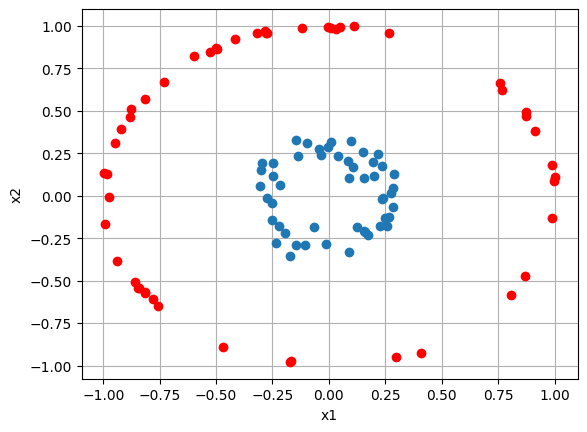

In [178]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP 2. 모델 만들기

In [179]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
        #case 1, very simple
        self.linear = nn.Sequential(nn.Linear(2, 1),
                                    nn.Sigmoid())

        #case 1, deep
        self.linear = nn.Sequential(nn.Linear(2, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 100),
                                    nn.Sigmoid(),
                                    nn.Linear(100, 1),
                                    nn.Sigmoid())
        
        # case 2, plain
        self.linear = nn.Sequential(nn.Linear(2, 1000),
                                    nn.Sigmoid(),
                                    nn.Linear(1000, 1),
                                    nn.Sigmoid())
        
        #case 2, very simple
        self.linear = nn.Sequential(nn.Linear(2, 1),
                                    nn.Sigmoid())

        # #case 2, deep
        # self.linear = nn.Sequential(nn.Linear(2, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 100),
        #                             nn.Sigmoid(),
        #                             nn.Linear(100, 1),
        #                             nn.Sigmoid())
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [180]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(5)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(10)])
# nn.Sequential(*[i for _ in range(5) for i in [nn.Linear(100,100), nn.Sigmoid()]])

In [181]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개 값으로 이루어진 좌표값 (x1,x2) 데이터 5개를 입력함

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP 3. 모델 학습시키기

In [182]:
from torch import optim
import torch.nn.functional as F

LR = 1e-1 # case 1
#LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
#LR = 1e-4 # case 2, very deep relu
EPOCH = 100 # case 1
#EPOCH = 500 # case 2, plain 에서 노드 천 개, deep, very deep relu

optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep
optimizer = optim.SGD(model.parameters(), lr=LR)
loss_history =[]

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat,y) # 머신의 출력과 label을 입력으로
    # update
    optimizer.zero_grad() #gradient의 누적을 막기 위해서 초기화
    loss.backward() # loss 미분
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]

    print(f"EPOCH: {ep+1}, train loss: {round(loss.item(),3)}")
    print("_"*20)

EPOCH: 1, train loss: 0.723
____________________
EPOCH: 2, train loss: 0.722
____________________
EPOCH: 3, train loss: 0.721
____________________
EPOCH: 4, train loss: 0.72
____________________
EPOCH: 5, train loss: 0.719
____________________
EPOCH: 6, train loss: 0.718
____________________
EPOCH: 7, train loss: 0.717
____________________
EPOCH: 8, train loss: 0.716
____________________
EPOCH: 9, train loss: 0.715
____________________
EPOCH: 10, train loss: 0.715
____________________
EPOCH: 11, train loss: 0.714
____________________
EPOCH: 12, train loss: 0.713
____________________
EPOCH: 13, train loss: 0.712
____________________
EPOCH: 14, train loss: 0.711
____________________
EPOCH: 15, train loss: 0.711
____________________
EPOCH: 16, train loss: 0.71
____________________
EPOCH: 17, train loss: 0.709
____________________
EPOCH: 18, train loss: 0.708
____________________
EPOCH: 19, train loss: 0.708
____________________
EPOCH: 20, train loss: 0.707
____________________
EPOCH: 21, 

In [183]:
# x= torch.tensor([1.],requires_grad=True)
# for _ in range(2):
#     loss=x**2
#     loss.backward()
#     print(x.grad)
#     x.grad = None # 초기화 시키지 않으면 누적이됨.

In [184]:
print(F.binary_cross_entropy(y_hat,y))
#binary_cross_entropy구현
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.6721, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6721, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

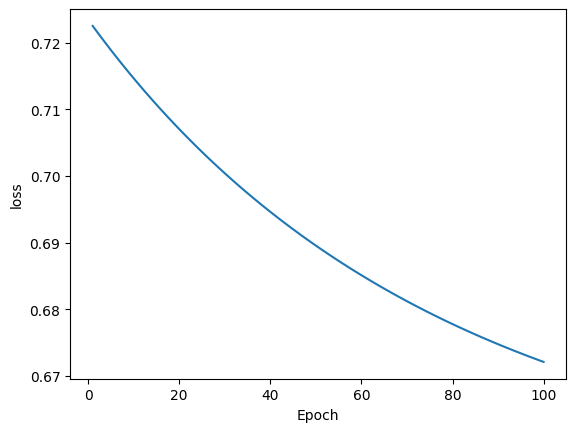

In [185]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

## STEP 4. 모델 테스트하기

torch.Size([30, 30, 2])


Text(0.5, 0.5, 'x2')

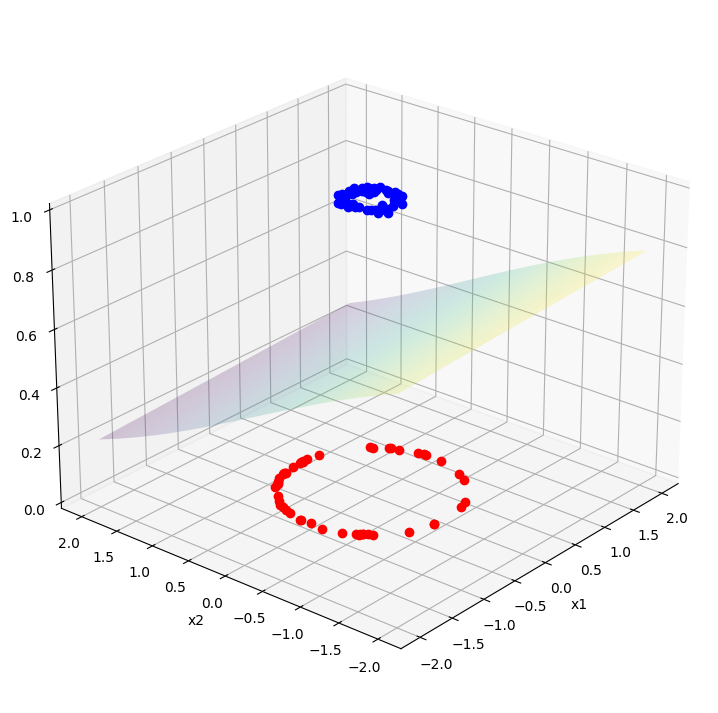

In [186]:
x1_test=torch.linspace(-10,10,30) # case 1
x2_test=torch.linspace(-10,10,30) # case 1
x1_test=torch.linspace(-2,2,30) # case 2
x2_test=torch.linspace(-2,2,30) # case 2
X1_test, X2_test=torch.meshgrid(x1_test,x2_test) # meshgrid를 통해 -10~10범위를 모두 봄
# print(X1_test)
X_test=torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # 개개채의 형태로 만들어줌
print(X_test.shape)

# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다 

model.eval() # test mode로 # 1. 해결
with torch.no_grad(): # 2. 해결 
    y_hat = model(X_test)
    Y_hat = y_hat.squeeze() # 시각화를 위해 30 x 30으로 스퀴즈

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [187]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)